# Le modèle de Solow simplifié et *résumé* en utilisant Python.

Pour utiliser ce notebook, il suffit d'appuyer sur Maj + Entrée pour exécuter une cellule. 

In [1]:
# On import deux packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Le capital  
Le modèle de Solow fait le lien entre le capital aggrégé **K**, le niveau de travail **L** aggrégé, et la production dans un pays **Y** (i.e. le PIB).  

En effet pour produire des biens et des services, il faut deux choses, du travail et du capital. En combinant les deux on peut produire des biens (le travail d'un agriculteur, combiné à des terres, des graines va produire des récoltes) et des services (le travail d'un médecin, et d'un cabinet médical va produire des consultations). 

On ne sait pas exactement comment le capital et le travail vont se combiner. Étant donné notre ignorance, on va dans un premier temps utiliser une fonction générale, qui dit simplement que quand on mélange K euros de capital et L heures travail, on va produire Y euros de biens et services.


$$Y = F(K,L)$$

Cependant Douglass un économiste a remarqué que la part du capital et du travail était constante dans l'économie. Qu'est-ce que cela veut dire ? xxxxxxxxxxxx


En s'associant au mathématicien Cobb, ils se rendent compte que ce qui respecte cette propriété est une fonction de type: 

$$Y = K^{\alpha} L^{1- \alpha}$$


Nous n'avons plus besoin d'utiliser la fonction générale de production $Y = F(K,L)$ puisque nous avons trouvé une fonction particulière (ou un cas particulier de notre fonction générale) qui décrit "assez" correctement la réalité.


Une des particularités de la fonction Cobb-Douglass est d'avoir des rendements d'échelles constants si $\alpha \in ]0,1[$

Ce qui nous permet en faisant l'hypothèse de l'agent représentatif (c'est à dire que l'on considère que notre économie peut être résumée à un individu moyen), de considérer notre économie sous forme intensive (ou par tête).

$$Y = K^{\alpha} L^{1- \alpha} \implies \frac{Y}{L} = \frac{K^{\alpha} L^{1- \alpha}}{L} = \left( \frac{K}{L}\right)^\alpha \left(\frac{L}{L}\right)^{(1-\alpha)}$$

$$ \implies \left( \frac{K}{L}\right)^\alpha $$

En définissant $y \equiv \frac{Y}{L}$ , et $k \equiv \frac{K}{L}$, on peut écrire :

$$y = k^\alpha$$




On va donc définir un vecteur de capital, qui défini juste différent niveau de capital par tête possible pour une économie.
Les chiffres sont peu élevés, mais nous pouvons considérer que ces montants sont en dizainne de milliers d'euros par exemple.

In [2]:
k = np.array([0,4,12,16,36,64,100,121,144])
k = np.array([0,4,12,16,20,36,])

Ensuite nous allons définir la fonction de production, qui est une fonction de Cobb-Douglass avec un $\alpha$ égal à 0.5

In [3]:
def f(k, alpha):
    return k**(alpha)
alpha = 0.5

Nous définissons ensuite le vecteur de production y qui associe la production par tête à un niveau de capital k.

In [4]:
y = f(k, alpha)
y

array([0.        , 2.        , 3.46410162, 4.        , 4.47213595,
       6.        ])

In [5]:
pd.DataFrame({"k": k, "y = f(k)" : y}).set_index("k") #Juse pour pour produire le tableau contenant les vecteurs y en fonction de k

,y = f(k)
k,
0,0.000000
4,2.000000
12,3.464102
16,4.000000
20,4.472136
36,6.000000


On voit donc que dans cette économie, si l'habitant moyen a à sa disposition 40 000 euros de capital, il va pouvoir produire 20 0000 euros de biens et services. Pour savoir quel va être le pib de cette économie, il suffit donc de multiplier y par le nombre d'habitants !

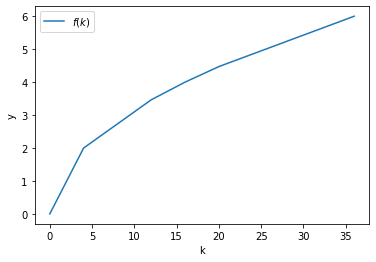

In [6]:
plt.plot(k,y, label = "$f(k)$")
plt.xlabel("k");plt.ylabel("y"); plt.legend()

Nous savons maintenant combien les habitants produisent en fonction du capital mis à leur disposition.
Nous nous demandons maintenant combien ils vont consommer.

On sait que dans cette économie, l'agent représentatif consomme 80% de ce qu'il produit dans l'année et garde les 20% restant, soit pour acheter de nouvelles machines (ou moyens de productions), soit pour entretenir ses machines qui viellissent/s'usent avec le temps (c'est ce que l'on appelle la dépréciation (ou l'armortissement) du capital que l'on note $\delta$).

Ce que l'agent représentatif ne consomme pas est appellé l'éparge, et dans le modèle de Solow, on fait l'hypothèse que cette épargne est exogène (non déterminée par le modèle) et fixe (on ne s'amuse pas à la faire varier d'une période à l'autre).

In [7]:
s = 0.2 # Le taux d'épargne

In [8]:
c = (1-s)*y
c

array([0.        , 1.6       , 2.77128129, 3.2       , 3.57770876,
       4.8       ])

Ce qui va être épargné par l'agent représentif est donc $i = s \times y$.

In [9]:
i = s * y
i


array([0.        , 0.4       , 0.69282032, 0.8       , 0.89442719,
       1.2       ])

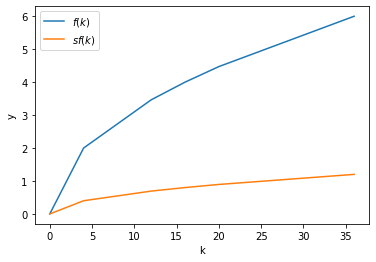

In [10]:
plt.plot(k,y, label = "$f(k)$")
plt.plot(k,s*y, label = "$sf(k)$")
plt.xlabel("k");plt.ylabel("y"); plt.legend()

Pour rappel l'écart entre la courbe orange et la courbe bleue représente la consommation.

La durée de vie du capital est égale au temps qu'il faut pour repayer tout le capital s'il se déprécie :

$$\delta K * T = K \iff \delta = \frac{K}{K * T} = \frac{1}{T}$$




Donc pour T = 20, $\delta = \frac{1}{20} = 0.05$

In [11]:
delta_k = k * 0.05

In [12]:
delta_k

array([0. , 0.2, 0.6, 0.8, 1. , 1.8])

In [13]:
delta_k_majuscule = i - delta_k

In [14]:
pd.DataFrame({"k": k, "y = f(k)" : y, "i" : i,"c":c, "$\delta k$": delta_k, "$\Delta k$":delta_k_majuscule}).set_index("k")

,y = f(k),i,c,$\delta k$,$\Delta k$
k,,,,,
0,0.000000,0.000000,0.000000,0.0,0.000000
4,2.000000,0.400000,1.600000,0.2,0.200000
12,3.464102,0.692820,2.771281,0.6,0.092820
16,4.000000,0.800000,3.200000,0.8,0.000000
20,4.472136,0.894427,3.577709,1.0,-0.105573
36,6.000000,1.200000,4.800000,1.8,-0.600000


### Etat stationnaire

L'économie est à l'état stationnaire quand elle n'évolue plus, c'est à dire quand $k_{t+1} =k_{t}$.
$$k_{t+1} =k_{t} \iff  k_{t+1} - k_{t}=0 $$
En économie nous notons souvent la variation d'une variable entre deux période par la lettre $\Delta$, et donc $\Delta k_t \equiv k_{t+1} - k_{t} $.  

La variation du capital d'une période à l'autre dans notre modèle de Solow simplifié est simplement le capital nouvellement créé $i$ moins le capital qui viellit $\delta k$.

$$\Delta k_t = i- \delta k = 0$$ $$\iff sf(k) - \delta k = 0 $$ $$ \iff \boxed{sf(k) = \delta k}$$

On rappellera que l'investissement est égal à l'épargne (qui est la production que l'on ne consomme pas $y-c$), et que l'épargne par tête est une part $s$ de la production $y$, ce qui fait que l'épargne par tête est égale à $sy$.

En terme de notation on notera $k^*$ le niveau de capital tel que $ sf(k) = \delta k $ et qui correspond donc au capital à l'état stationnaire (on pourra étendre cette notation pour $c^*$, $y^*$, et $i^*$ qui representerons respectivement la consommation, la production et l'investissement, par tête à l'état stationnaire).

Graphiquement  $sf(k) = \delta k$ est le point ou la courbe $sf(k)$ coupe la droite $\delta k$.

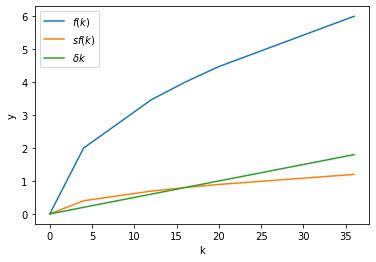

In [15]:
plt.plot(k,y, label = "$f(k)$")
plt.plot(k,s*y, label = "$sf(k)$")
plt.plot(k,delta_k, label = "$\delta k$")
plt.xlabel("k");plt.ylabel("y"); plt.legend()

On voit que la courbe $\delta k$ coupe $sf(k)$ en $k = 16$.

On voit également dans le tableau précédent que l'état stationnaire est atteint pour $k = 16$ car on voit bien que $\delta{k} = 0$ (mais également que $i = \delta k$).

Mais on peut rapidement calculer $k^*$ à partir des données du problème.

On sait que: 
   1. $\alpha = 0.5$
   1. $\delta = 0.05$
   1. $s = 0.2$
   3. $sf(k^*) = \delta k^* $

En replaçant les valeurs de $\alpha$, $\delta$ et $s$ dans la dernière équation on obtient:
 $$1k^{0.5} = 0.05 k$$ 
 $$ \implies \frac{0.2}{0.5} = \frac{k^1}{k^{0.5}}$$ 
 $$  \implies \frac{0.2}{0.5}= \frac{k^1}{k^{0.5}} $$
 $$ \implies 4 = k^{0.5} $$
 $$ \boxed{k^* = 4^2 = 16}$$
 


### Variation de l'épargne dans l'état stationnaire.

On a vu où était l'état stationnaire de cette économie pour un niveau d'épargne de 20%, que ce passerait-t-il si on changeait le niveau d'épargne ?

#### Raisonnement aux extrêmes:   

   * Que se passerait-il si le taux d'épargne est nul ?
   * Que se passerait-il si le taux d'épargne est égal à 1 ?  
   
   
Si le taux d'épargne est nul ($s = 0$), on n'investit rien dans l'économie, et le capital va viellir jusqu'à [ne valoir plus rien](https://fr.wikipedia.org/wiki/Effondrement_des_immeubles_rue_d%27Aubagne_à_Marseille), c'est à dire que $k = 0$. On aurait donc $y = f(0) = 0^{0.5} = 0$, on ne produirait plus rien car il n'y a pas de capital (machines) pour produire, et on ne **consommerait** donc rien.

Si le taux d'épargne est égal à 100% ($s = 1$), les habitants vont épargner toute leur production et vont tout réinvestir dans leur économie pour augmenter k, ils ne consommeraient rien... Ils auraient un PIB par tête très élevé, mais ils serait totalement pauvre car leur consommation serait de 0.

Entre les deux on voit que plus on augmente $s$ plus le niveau de capital $k$ sera élevé à l'état stationnaire (la courbe $sf(k)$ se "déformerait" vers le haut (voir par exemple avec le graphique animé)).



### Règle d'or

Le but d'une économie n'est pas d'avoir le plus haut PIB par tête (et donc de maximiser y), mais bien de maximiser la consommation par tête c !  Car comme chacun le sait, plus on consomme, plus on est heureux, et le but d'une économie est de consommer le plus possible ⸮  


(La ponctuation ci dessus est [point d'ironie](https://fr.wikipedia.org/wiki/Point_d%27ironie)).

Il existe, pour chaque taux d'épargne entre 0 et 1, un état stationnaire . Le capital $k$ à l'état stationnaire est positif ($k \geq 0$), mais entraine une consommation nulle en $k^*$ pour $s = 0$ ou $s = 1$, si on a pour un taux d'épargne s un niveau de capital strictement positif ($k^*>0$), alors il existe un niveau de consommation $c^*$ qui est maximal. 

Plus on épargne, plus on augmente le niveau de capital dans l'économie. La fonction intensive de production est concave, c'est à dire que plus le capital est élevé dans l'économie, plus la productivité marginale va être faible : 
l'ajout d'une unité de capital supplémentaire (faire augmenter $k$ d'une unité) va faire augmenter la production $y$ dans des proportions de plus en plus faibles au fur et à mesure que k augmente (autrement dit $f'(k)$ décroit quand k augmente).  

À l'inverse la dépréciation du capital est linéaire, c'est à dire que faire augmenter $k$ d'une unité va faire augmenter le capital déprécié dans des proportions constantes  ($(\delta k)'$ est constant). 

Sachant que la consommation à l'état stationnaire est égale à la production moins la dépréciation du capital $c^{*} = y^* -  \delta k^* $.(Faire la preuve)

Cela implique que si on part d'un niveau faible de capital (gauche du graphique), augmenter d'une unité de capital la production, va faire fortement augmenter y, mais va faire augmenter la dépréciation du capital de $\delta$. Tant que l'augmentation de la production est **plus grande** que l'augmentation de la dépréciation du capital, la consommation va augmenter.  

Cependant si k est élevé (sur la droite du graphique), augmenter le capital va entrainner une augmentation de la production **plus petite** que l'investissement qu'il faudra rajouter garder le capital constant ( c'est à dire garder $i = \delta k$ pour rester à l'état stationnaire).

**La consomation est maximale quand l'augmentation de la production va être égale à l'augmentation de la dépréciation pour une petite variation de $k$**.  
Ce qui mathématiquement va s'écrire : 
$$\boxed{f'(k) = \delta}$$

C'est ce qui traduit la régle d'or.

Graphiquement c'est quand la tangeante à la courbe $f(k)$ en $k^*$ est paralèle à la droite de dépréciation du capital  $\delta k$.

#### Calcul du niveau de capital

$f'(k_{or}) = (k_{or}^\alpha)' = 0.5k^{-0.5} $
$$f'(k) = \delta \implies 0.5k^{-0.5} = 0.05 $$
$$\implies k^*_{or} = \left( \frac{0.05}{0.5} \right)^{-\frac{1}{0.5}}= \left( \frac{0.05}{0.5} \right)^{-2} = \left( \frac{0.5}{0.05} \right)^{2} = \left( \frac{10}{1} \right)^{2}= 10^2= 100$$

#### Calcul du taux d'épargne qui permet de respecter la règle d'or

On sait que le capital qui maximize la consommation à l'état stationnaire est $k^{or}$.   

On souhaite maintenant trouver le taux d'épargne $s^{or}$qui permet d'atteindre cet état stationnaire.  



Etat stationnaire: $$\delta k^{or} = sf(k^{or})$$  

$$\implies s^{or} = \frac{\delta k^{or}}{f(k^{or})} $$  

$$\implies s^{or} = \frac{0.05 \times 100}{100^{0.5}}= 0.5 $$

### Interprétation graphique du modèle de Solow

In [16]:
import seaborn as sns

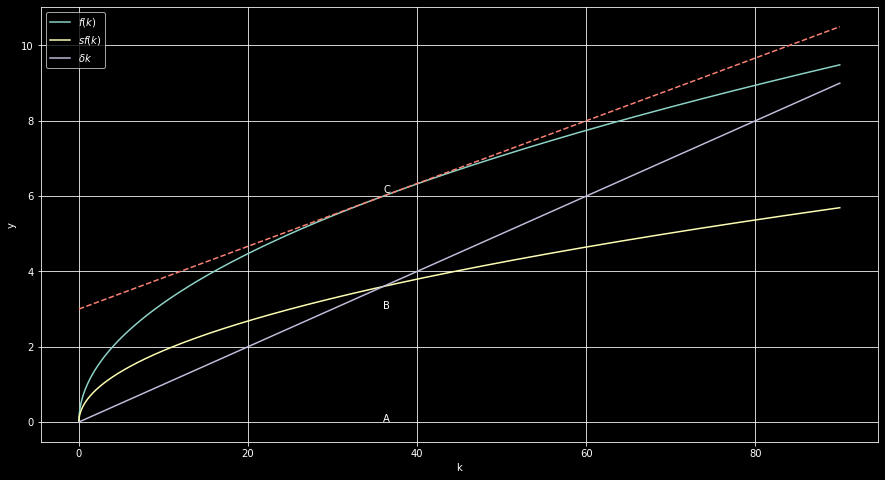

In [17]:
plt.style.use('dark_background')

k = np.arange(0,90,0.01)
y = k**(1/2)
s = 0.6
c = (1-s)*y
delta_k = k * 0.1

tangeante = 1/12* k + 3

plt.figure(figsize = (15,8))
plt.plot(k,y, label = "$f(k)$")
plt.plot(k,s*y, label = "$sf(k)$")
plt.plot(k, delta_k, label = "$\delta k$")


plt.text(36,6.1  ,"C")
plt.text(36,3  ,"B")
plt.text(36,0  ,"A")


plt.plot(k, tangeante, "--")

#plt.plot(k,y-s*y, label = "consumption")

plt.xlabel("k");plt.ylabel("y"); plt.legend()
plt.grid()



Le graph ci-dessus est une représentation graphique du modèle de Solow à l'état stationnaire.  

Questions: 
    1. Que représente la distance entre le point A et le point C ?
    2. Que représente la distance entre B et C ?
    3. Que représente la distance entre A et B ?
    4. Est-ce que nous sommes à l'état stationnaire pour le niveau de production au point C ?
    5. Est-ce que la règle d'or est respectée ?

Réponses:
   1. C'est le niveau de production $f(k)$ (le pib par tête pour k unité de capital par tête).
   2. C'est la consommation. En effet les ménages épargnent $sf(k)$ au point B et produisent $f(k)$ au point C, ils leur restent donc $f(k)-sf(k)$ à consommer, ce qui est représenté par la distance entre B et C.  
   3. AC peut représenter soit le niveau d'épargne $ s f(k)$ (coube jaune), soit le niveau de dépréciation du capital ($\delta k$).
   4. Oui ! En effet on voit que $y$ (soit $f(k)$ c'est pareil) au point C, correspond à un niveau de capital k, où les courbes de dépréciation du capital ($\delta k$, courbe violette) et d'épargne ($sf(k)$ courbe violette) se coupent. On a donc $sf(k) = \delta k$, nous sommes donc bien à l'état stationnaire.
   5. Pour que la règle d'or soit respectée, il faut que $\delta = f'(k)$ et donc que la courbe rouge et violette soient parallèles. Les deux courbes ne sont pas parallèles, ici nous ne respectons donc pas la règle d'or.

Question: Faudrait-il augmenter ou diminuer s pour être à $k_or^*$ ? 

Réponse: On voit que la pente de $\delta k$ (la courbe violette), est plus grande que la pente de $f(k)$ à l'état stationnaire.  
Le rendement marginal du capital est donc inférieur à la dépréciation marginale du capital : On a trop de capital !  

Pour diminuer le niveau de capital à l'état stationnaire, il faut diminuer le taux d'épargne. Ainsi le niveau de capital à l'état stationnaire va se déplacer vers la gauche, et va faire augmenter la pente de la courbe rouge (et il faut continuer à diminuer s, jusqu'à ce la courbe rouge soit parralèle à la courbe violette.).